In [1]:
# Uncomment to upgrade packages
# !pip install pandas --user --upgrade --quiet
# !pip install numpy --user --upgrade --quiet
# !pip install scipy --user --upgrade --quiet
# !pip install statsmodels --user --upgrade --quiet
# !pip install seaborn --user --upgrade --quiet
# !pip install scikit-learn --user --upgrade --quiet

%load_ext autoreload

In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn.cluster import AgglomerativeClustering

#Pel dendograma
from scipy.cluster.hierarchy import dendrogram

In [4]:
#llegir dades
Telecom = read_csv("telecom_hc.csv", index_col=0, delimiter=';')

In [5]:
Telecom.shape

(7043, 28)

In [6]:
numerical_columns = Telecom.dtypes[Telecom.dtypes!='object'].index
Telecom = Telecom[numerical_columns]

In [7]:
Telecom.shape
Telecom.dtypes

(7043, 28)

Married                                 int64
Number of Dependents                    int64
Zip Code                              float64
Number of Referrals                     int64
Tenure in Months                      float64
Avg Monthly GB Download               float64
Paperless Billing                       int64
Monthly Charge                        float64
Age_disc                              float64
Total Streaming                       float64
Premium Services                      float64
Refunds                               float64
Average Monthly Extra Data Charges    float64
None                                  float64
Offer A                               float64
Offer B                               float64
Offer C                               float64
Offer D                               float64
Offer E                               float64
Cable                                 float64
DSL                                   float64
Fiber Optic                       

In [8]:
#linkage ward
#metric euclidea (onehot encoding)

In [9]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='ward').fit(Telecom)

In [10]:
clustering.labels_

array([3675, 5303, 5659, ...,    1,    2,    0], dtype=int64)

In [11]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

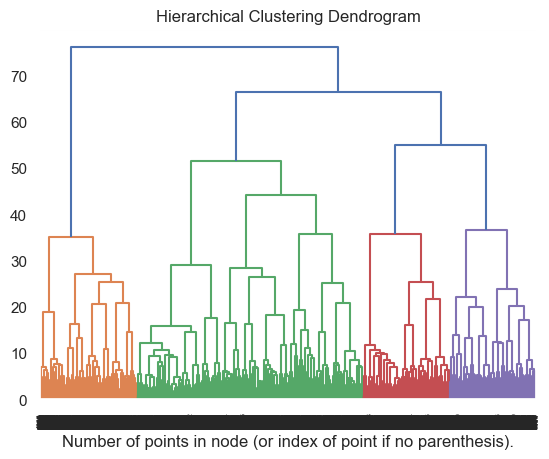

In [12]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="none") #level -> p=
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [13]:
# partir en 2

In [14]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=2, metric='euclidean', linkage='ward').fit(Telecom)

In [15]:
labs2 = clustering.labels_
labs2 = pd.DataFrame(labs2)
labs2

,0
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,0


In [16]:
clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=3, metric='euclidean', linkage='ward').fit(Telecom)

In [17]:
labs3 = clustering.labels_
labs3 = pd.DataFrame(labs3)
labs3

,0
0,0
1,2
2,2
3,0
4,2
...,...
7038,0
7039,0
7040,2
7041,0


# MDS

In [18]:
# fet en DBScan ja que utilizem gower

In [19]:
df_mds = read_csv("df_mds.csv", index_col=0, delimiter=';')

In [20]:
df_mds

,0,1
0,0.135,0.076
1,-0.160,-0.317
2,-0.203,-0.093
3,-0.097,0.211
4,0.019,0.084
...,...,...
7038,-0.143,-0.329
7039,-0.056,0.164
7040,-0.183,-0.262
7041,0.304,0.237


## projecció pintat per clúster

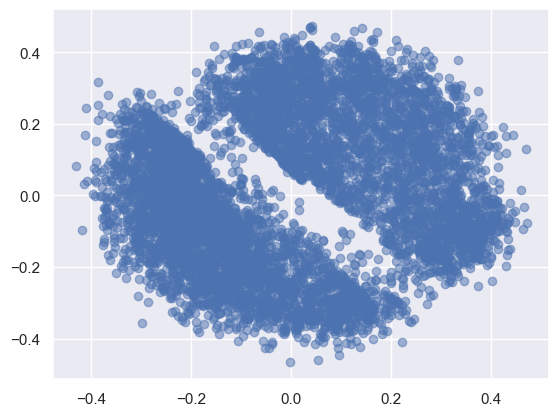

In [21]:
plt.scatter(df_mds['0'], df_mds['1'], alpha=0.5);

In [22]:
tc = df_mds.copy()
tc = tc.join(labs2)

In [23]:
tc = tc.rename(columns={0: "label2"})

In [24]:
tc = tc.join(labs3)
tc = tc.rename(columns={0: "label3"})

### 2 clústers

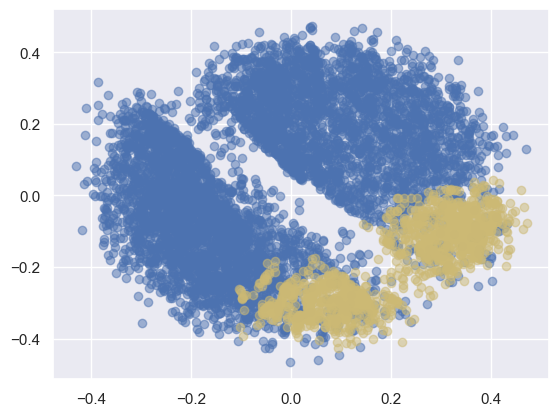

In [25]:
plt.scatter(tc.loc[tc['label2'] == 0, "0"], tc.loc[tc['label2'] == 0, "1"], alpha=0.5, color='b');
plt.scatter(tc.loc[tc['label2'] == 1, "0"], tc.loc[tc['label2'] == 1, "1"], alpha=0.5, color='y');

### 3 clústers

In [26]:
tc['label3'].value_counts()

2    3206
0    2452
1    1385
Name: label3, dtype: int64

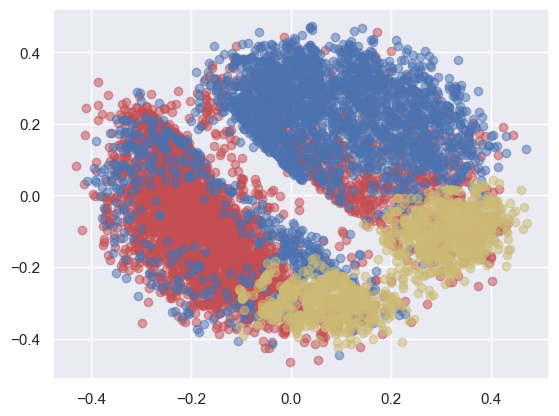

In [27]:
plt.scatter(tc.loc[tc['label3'] == 2, "0"], tc.loc[tc['label3'] == 2, "1"], alpha=0.5, color='r');
plt.scatter(tc.loc[tc['label3'] == 0, "0"], tc.loc[tc['label3'] == 0, "1"], alpha=0.5, color='b');
plt.scatter(tc.loc[tc['label3'] == 1, "0"], tc.loc[tc['label3'] == 1, "1"], alpha=0.5, color='y');
# plt.scatter(tc.loc[tc['label3'] == 2, "0"], tc.loc[tc['label3'] == 2, "1"], alpha=0.5, color='r');

In [33]:
tele = read_csv("telecom_dbs.csv", index_col=0, delimiter=';')
tele = tele.join(labs3)
tele = tele.rename(columns={0: "label"})

In [34]:
tele[tele['label']==0].shape
tele[tele['label']==0].describe()

(2452, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.000,2452.0
mean,0.269,0.570,0.798,0.647,0.316,0.619,0.469,0.583,0.601,0.094,0.004,0.0
std,0.444,0.303,0.402,0.308,0.235,0.197,0.293,0.405,0.228,0.292,0.020,0.0
min,0.000,0.000,0.000,0.000,0.024,0.071,0.000,0.000,0.000,0.000,0.000,0.0
25%,0.000,0.344,1.000,0.394,0.153,0.472,0.250,0.333,0.500,0.000,0.000,0.0
50%,0.000,0.574,1.000,0.718,0.247,0.631,0.500,0.667,0.667,0.000,0.000,0.0
75%,1.000,0.869,1.000,0.930,0.353,0.779,0.667,1.000,0.833,0.000,0.000,0.0
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.625,0.0


In [35]:
tele[tele['label']==1].shape
tele[tele['label']==1].describe()

(1385, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,1385.000,1385.000,1385.000,1385.000,1385.0,1385.000,1385.000,1385.0,1385.000,1385.000,1385.0,1385.0
mean,0.378,0.569,0.466,0.433,0.0,0.042,0.380,0.0,0.039,0.066,0.0,1.0
std,0.485,0.305,0.499,0.343,0.0,0.021,0.236,0.0,0.070,0.249,0.0,0.0
min,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,1.0
25%,0.000,0.328,0.000,0.113,0.0,0.028,0.167,0.0,0.000,0.000,0.0,1.0
50%,0.000,0.590,0.000,0.366,0.0,0.033,0.417,0.0,0.000,0.000,0.0,1.0
75%,1.000,0.869,1.000,0.746,0.0,0.041,0.583,0.0,0.000,0.000,0.0,1.0
max,1.000,1.000,1.000,1.000,0.0,0.098,1.000,0.0,0.167,1.000,0.0,1.0


In [36]:
tele[tele['label']==2].shape
tele[tele['label']==2].describe()

(3206, 18)

,Number of Dependents,Zip Code,Number of Referrals,Tenure in Months,Avg Monthly GB Download,Monthly Charge,Age_disc,Total Streaming,Premium Services,Refunds,Average Monthly Extra Data Charges,label
count,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.000,3206.0
mean,0.138,0.560,0.193,0.289,0.288,0.527,0.449,0.378,0.388,0.063,0.010,2.0
std,0.345,0.304,0.395,0.289,0.230,0.237,0.285,0.403,0.225,0.244,0.056,0.0
min,0.000,0.000,0.000,0.000,0.000,0.019,0.000,0.000,0.000,0.000,0.000,2.0
25%,0.000,0.328,0.000,0.042,0.129,0.330,0.250,0.000,0.167,0.000,0.000,2.0
50%,0.000,0.557,0.000,0.183,0.235,0.561,0.417,0.333,0.333,0.000,0.000,2.0
75%,0.000,0.869,0.000,0.479,0.341,0.712,0.667,0.667,0.500,0.000,0.000,2.0
max,1.000,1.000,1.000,1.000,1.000,0.984,1.000,1.000,1.000,1.000,1.000,2.0


In [38]:
tele.dtypes

Married                                object
Number of Dependents                    int64
Zip Code                              float64
Number of Referrals                     int64
Tenure in Months                      float64
Offer                                  object
Internet Type                          object
Avg Monthly GB Download               float64
Contract                               object
Paperless Billing                      object
Payment Method                         object
Monthly Charge                        float64
Age_disc                              float64
Total Streaming                       float64
Premium Services                      float64
Refunds                               float64
Average Monthly Extra Data Charges    float64
label                                   int64
dtype: object

In [39]:
c0=tele[tele['label']==0]
c1=tele[tele['label']==1]
c2=tele[tele['label']==2]

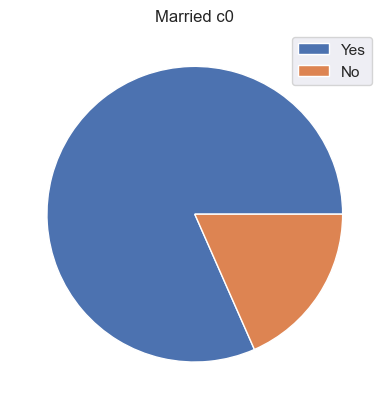

In [40]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Married"].value_counts());
ax.legend(patches, labels=c0["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married c0")
plt.show();

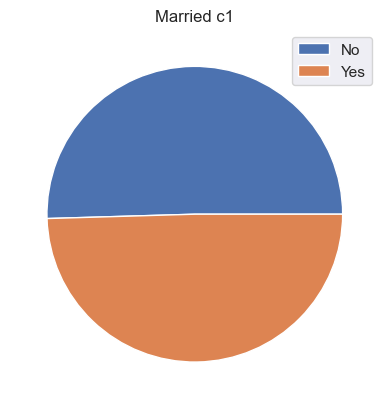

In [41]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Married"].value_counts());
ax.legend(patches, labels=c1["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married c1")
plt.show();

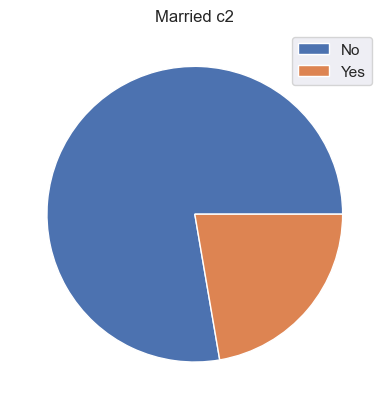

In [56]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Married"].value_counts());
ax.legend(patches, labels=c2["Married"].value_counts().index, loc="best");  # ordre labels
plt.title("Married c2")
plt.show();

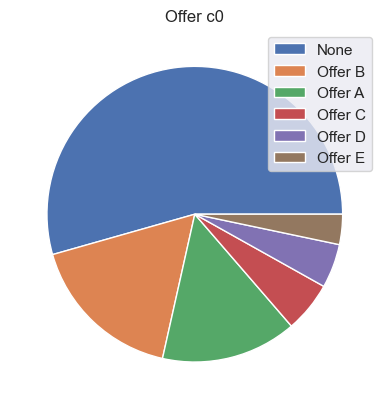

In [42]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Offer"].value_counts());
ax.legend(patches, labels=c0["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer c0")
plt.show();

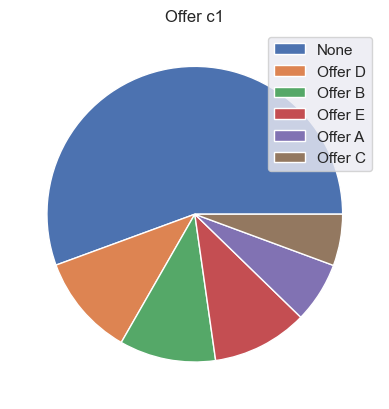

In [43]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Offer"].value_counts());
ax.legend(patches, labels=c1["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer c1")
plt.show();

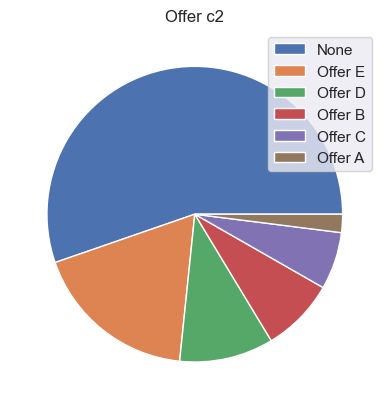

In [58]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Offer"].value_counts());
ax.legend(patches, labels=c2["Offer"].value_counts().index, loc="best");  # ordre labels
plt.title("Offer c2")
plt.show();

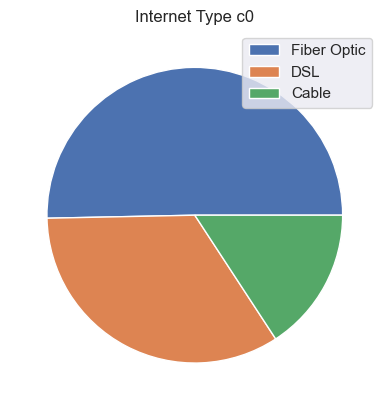

In [44]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Internet Type"].value_counts());
ax.legend(patches, labels=c0["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type c0")
plt.show();

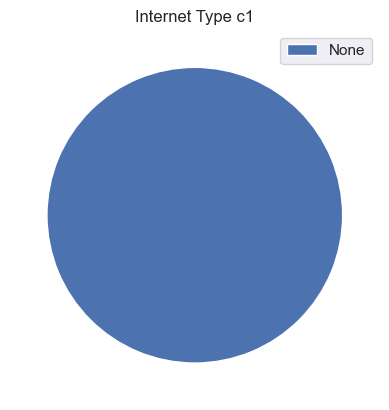

In [45]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Internet Type"].value_counts());
ax.legend(patches, labels=c1["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type c1")
plt.show();

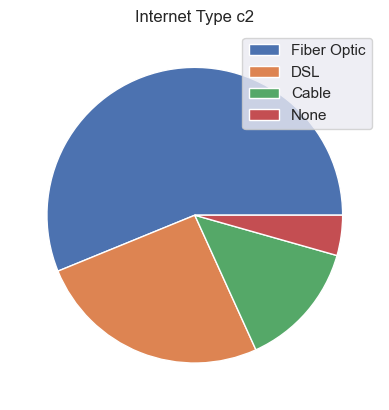

In [59]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Internet Type"].value_counts());
ax.legend(patches, labels=c2["Internet Type"].value_counts().index, loc="best");  # ordre labels
plt.title("Internet Type c2")
plt.show();

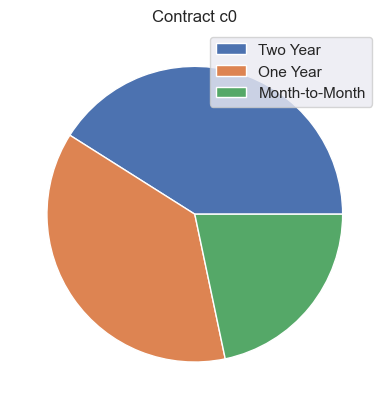

In [46]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Contract"].value_counts());
ax.legend(patches, labels=c0["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract c0")
plt.show();

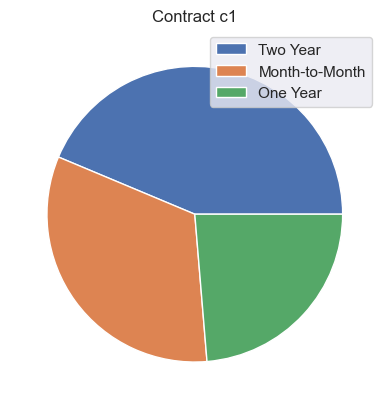

In [47]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Contract"].value_counts());
ax.legend(patches, labels=c1["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract c1")
plt.show();

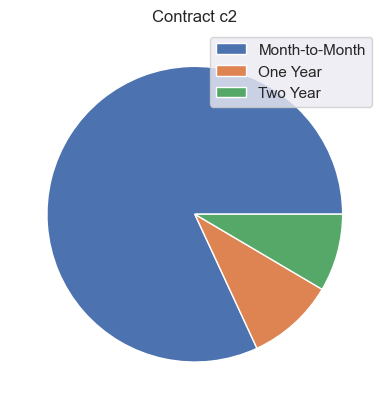

In [60]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Contract"].value_counts());
ax.legend(patches, labels=c2["Contract"].value_counts().index, loc="best");  # ordre labels
plt.title("Contract c2")
plt.show();

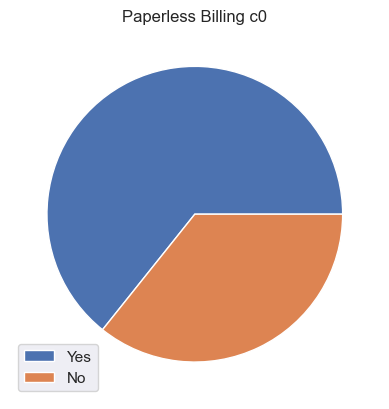

In [48]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Paperless Billing"].value_counts());
ax.legend(patches, labels=c0["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing c0")
plt.show();

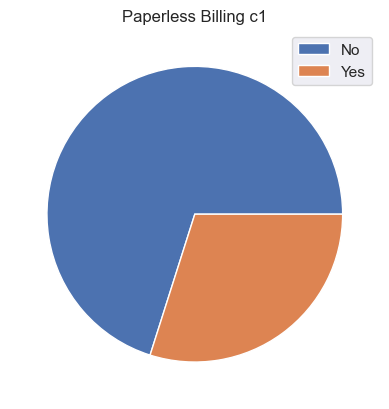

In [49]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Paperless Billing"].value_counts());
ax.legend(patches, labels=c1["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing c1")
plt.show();

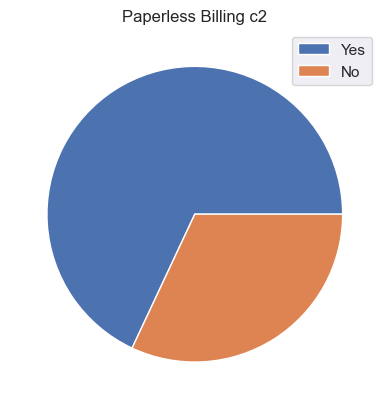

In [61]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Paperless Billing"].value_counts());
ax.legend(patches, labels=c2["Paperless Billing"].value_counts().index, loc="best");  # ordre labels
plt.title("Paperless Billing c2")
plt.show();

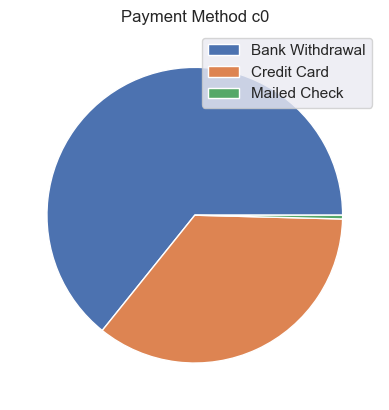

In [50]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c0["Payment Method"].value_counts());
ax.legend(patches, labels=c0["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method c0")
plt.show();

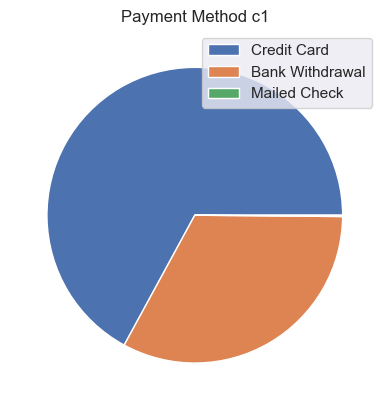

In [51]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c1["Payment Method"].value_counts());
ax.legend(patches, labels=c1["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method c1")
plt.show();

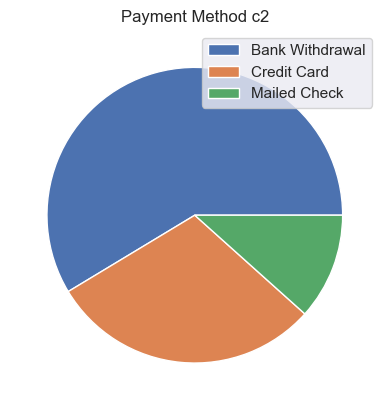

In [62]:
fig, ax = plt.subplots();
patches, _ = ax.pie(c2["Payment Method"].value_counts());
ax.legend(patches, labels=c2["Payment Method"].value_counts().index, loc="best");  # ordre labels
plt.title("Payment Method c2")
plt.show();

In [52]:
status = read_csv("y_Telecom.csv", index_col=0, delimiter=';')
tele = tele.join(status)

In [55]:
data_crosstab = pd.crosstab(tele['label'], 
                                tele['Customer Status'],
                                    margins = False)
data_crosstab

Customer Status,Churned,Joined,Stayed
label,,,
0,436,30,1986
1,84,160,1141
2,1349,264,1593
